<a href="https://colab.research.google.com/github/20522182/Basic_Machine_Learning/blob/main/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
PATH = 'drive/MyDrive/Public_DataSet/housing.csv'

In [ ]:
#Thêm thư viện để đọc DL
import pandas as pd


In [ ]:
data = pd.read_csv(PATH)
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


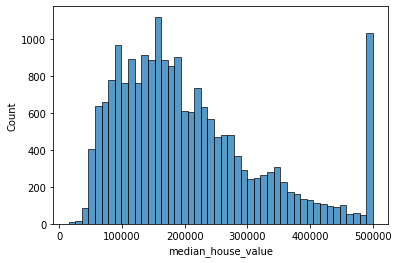

In [ ]:
#Thêm thư viện và vẽ biểu đồ phân bố của thuộc tính DL
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data['median_house_value'])
#Khoảng min-max [14999,500001]

In [ ]:
data.median_house_value.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [ ]:
data.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
newList = data.isnull().sum()
print (newList)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


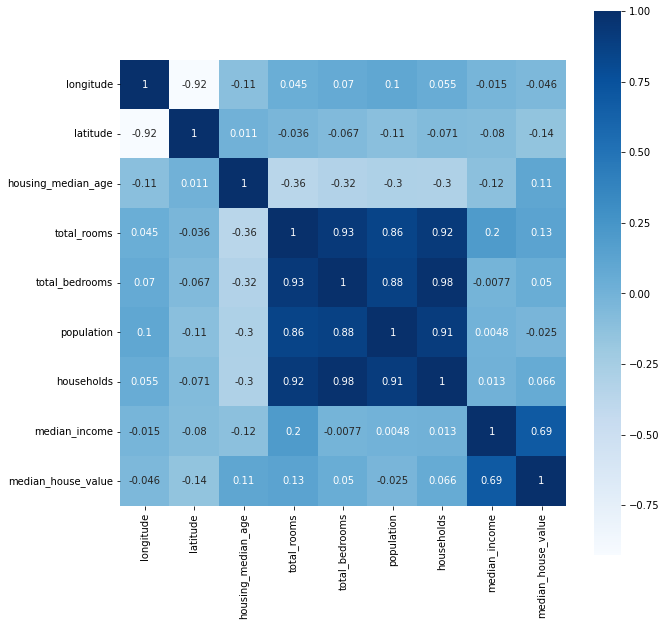

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# tinh su phu thuoc cua tung thuoc tinh
correlation = data.corr(method='pearson')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

Đo độ tương quan : pearson, kendall, spearman

In [ ]:
X=data ['median_income']
y=data ['median_house_value']

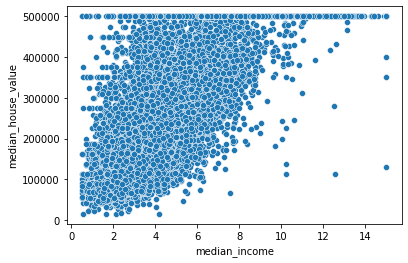

In [ ]:
import seaborn as sns
import pandas as pd
data_visualize = pd.DataFrame({"median_income": X, "median_house_value": y})

# Ve bieu do tan xa du lieu huan luyen
sns.scatterplot(data=data_visualize, x=X,y=y)

In [ ]:
#Phân chia dữ liệu thành tập huấn luyện và tập kiểm thử
from sklearn.model_selection import train_test_split
#tỉ lệ test 0.2 thì train ->0.8, train_test_split trả về tuble
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape

(16512,)

In [ ]:
#Bộ scaler MinMaxScaler: đưa biến về miền giá trị [0,1], dùng tham số feature_range đưa min, max muốn.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
#Đưa y về vector ->transform về miền gtri 1,50 và fit
y_transformed =sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test_transformed =sc.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train.array.reshape(-1,1), y_transformed)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test.array.reshape(-1,1)).reshape(-1)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


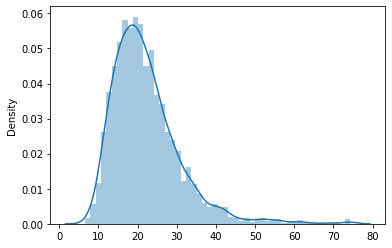

In [ ]:
sns.distplot(y_pred)

In [ ]:
#Kiểm tra mô hình: dùng độ đo bình phương trung bình sai số (mean square error - MSE). 
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_transformed, y_pred, squared =True)

87.90581581394004

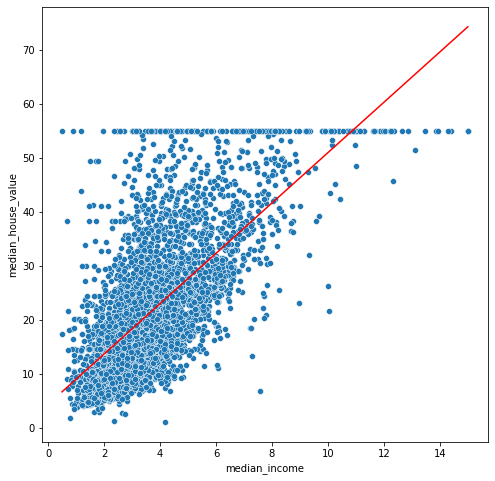

In [ ]:
import seaborn as sns

test_true = pd.DataFrame({'median_income':X_test, 'median_house_value':y_test_transformed})
test_pred = pd.DataFrame({'median_income':X_test, 'median_house_value': y_pred})
fig= plt.figure(figsize=(8,8))
sns.lineplot(data=test_pred, x="median_income",y="median_house_value", color='red')
sns.scatterplot(data=test_true, x="median_income",y="median_house_value")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
y_transformed = sc.fit_transform(y.values.reshape(-1,1)).reshape(-1)


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
median_income_avg_mse = []
kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
X.values.reshape(-1)
for train_index, test_index in kf.split(X, y_transformed):
 X_train = X.values[train_index].reshape(-1,1)
 y_train = y_transformed[train_index]
 X_test = X.array[test_index].reshape(-1,1)
 y_test = y_transformed[test_index]
 model = LinearRegression()
 model.fit(X_train, y_train)
 y_pred = model.predict(X_test)
 result = mean_squared_error(y_test, y_pred, squared=True)

 # Lưu lại kết quả từng fold vào avg_mse
 median_income_avg_mse.append(result)
 import numpy as np
np.mean(np.array(median_income_avg_mse))
print(median_income_avg_mse)


[87.90581581394004, 85.29054554832335, 89.37283873635471, 89.30774651736782, 87.52453948479425, 85.60979878870158, 86.3045034115234, 88.07837550250288, 89.67777041636644, 85.792519146726]


In [ ]:
#-------------------------- CÂU 2 ------------------------------------
X=data ['total_bedrooms']
# Xu ly cho thuoc tinh Null bằng pp điền thiếu. Điền gt base on median của previous gtr

import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='median')
X_processed = imp.fit_transform(X.values.reshape(-1,1)).reshape(-1)

#Phân chia dữ liệu thành tập huấn luyện và tập kiểm thử
from sklearn.model_selection import train_test_split
#tỉ lệ test 0.2 thì train ->0.8, train_test_split trả về tuble
X_train, X_test, y_train, y_test = train_test_split(X_processed,y, test_size=0.2, random_state=42)
X_processed.shape

(20640,)

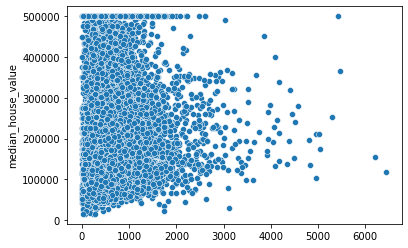

In [ ]:
import seaborn as sns
import pandas as pd
data_visualize = pd.DataFrame({"total_bedrooms": X_processed, "median_house_value": y})
# Ve bieu do tan xa du lieu huan luyen
sns.scatterplot(data=data_visualize, x=X_processed,y=y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
#Đưa y về vector ->transform về miền gtri 1,50 và fit
y_train_transformed =sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1)
y_test_transformed =sc.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)



In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train.reshape(-1,1), y_train_transformed)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test.reshape(-1,1)).reshape(-1)
#Kiểm tra mô hình: dùng độ đo bình phương trung bình sai số (mean square error - MSE). 
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_transformed, y_pred, squared =True)

161.98877034272647

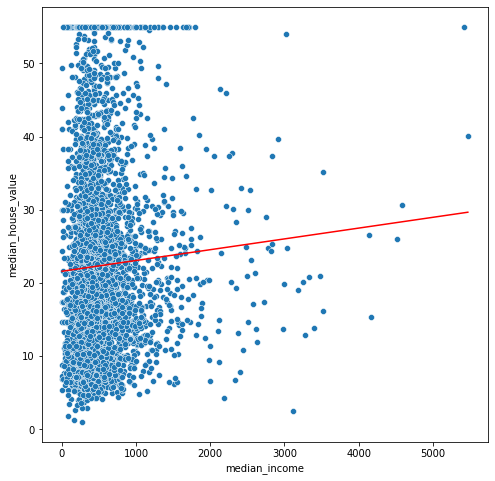

In [ ]:
import seaborn as sns

test_true = pd.DataFrame({'median_income':X_test, 'median_house_value':y_test_transformed})

test_pred = pd.DataFrame({'median_income':X_test, 'median_house_value': y_pred})

fig= plt.figure(figsize=(8,8))

sns.lineplot(data=test_pred, x="median_income",y="median_house_value", color='red')

sns.scatterplot(data=test_true, x="median_income",y="median_house_value")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(1, 55))

y_transformed = sc.fit_transform(y.values.reshape(-1,1)).reshape(-1)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

kf = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
total_bedrooms_avg_mse = []
for train_index, test_index in kf.split(X_processed, y_transformed):
 X_train = X_processed[train_index].reshape(-1,1)
 y_train = y_transformed[train_index]
 X_test = X_processed[test_index].reshape(-1,1)
 y_test = y_transformed[test_index]
 model = LinearRegression()
 model.fit(X_train, y_train)
 y_pred = model.predict(X_test)
 result = mean_squared_error(y_test, y_pred, squared=True)

 # Lưu lại kết quả từng fold vào avg_mse

 total_bedrooms_avg_mse.append(result)
 import numpy as np
np.mean(np.array(total_bedrooms_avg_mse))
print(total_bedrooms_avg_mse)

[161.98877034272647, 158.0534525428832, 168.70663648440416, 168.42001823413196, 163.4588057626119]


In [ ]:
#----------------------- CÂU 3 --------------------------

X= data[["total_bedrooms","median_income"]]

In [ ]:
# Xu ly cho thuoc tinh Null bằng pp điền thiếu. Điền gt base on median của previous gtr

import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan,strategy='median')
X_processed = imp.fit_transform(X.values.reshape(-1,1)).reshape(-1,2)

#Phân chia dữ liệu thành tập huấn luyện và tập kiểm thử
from sklearn.model_selection import train_test_split
#tỉ lệ test 0.2 thì train ->0.8, train_test_split trả về tuble
X_train, X_test, y_train, y_test = train_test_split(X_processed,y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
#Đưa y về vector ->transform về miền gtri 1,50 và fit
y_transformed =sc.fit_transform(y_train.values.reshape(-1,1)).reshape(-1,1)
y_test_transformed =sc.fit_transform(y_test.values.reshape(-1,1)).reshape(-1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train.reshape(-1,2), y_transformed)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test.reshape(-1,2)).reshape(-1)
#Kiểm tra mô hình: dùng độ đo bình phương trung bình sai số (mean square error - MSE). 
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_transformed, y_pred, squared =True)

87.43855915138248

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(1, 55))

y_transformed = sc.fit_transform(y.values.reshape(-1,1)).reshape(-1)


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
avg_mse = []
for train_index, test_index in kf.split(X_processed, y_transformed):
 X_train = X_processed.reshape(-1,2)[train_index].reshape(-1,1)
 y_train = y_transformed[train_index]
 X_test = X_processed.reshape(-1,2)[test_index].reshape(-1,1)
 y_test = y_transformed[test_index]
 model = LinearRegression()
 model.fit(X_train.reshape(-1,2), y_train)
 y_pred = model.predict(X_test.reshape(-1,2))
 result = mean_squared_error(y_test, y_pred, squared=True)

 # Lưu lại kết quả từng fold vào avg_mse

avg_mse.append(result)
import numpy as np
np.mean(np.array(avg_mse))
print(avg_mse)

[85.27212238129101]
